In [28]:
%matplotlib inline
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [340]:
database = "/Users/amirhsi_mini/research_data/hns_cubic/N200epshm29nh36ac2nc5969mc8l25dt0.005ndump2000adump5000ens2"
gyr_file = glob(database + "/*gyrTDna.txt")[0]

In [341]:
gyr = np.loadtxt(gyr_file)
#gyr[:,1] = (gyr[:,1] - gyr[:,1].mean())/ np.var(gyr[:,1])
t_step=1
gyr = gyr[::t_step,:]
#t_i=2.13*10**8
#t_f=2.53*10**8
gyr = pd.DataFrame(gyr, columns=["t", "gyr"])
#gyr = gyr[gyr['t']<=1.03*10**8]
#gyr = gyr.loc[(gyr['t']>=t_i)&(gyr['t']<=t_f),:]
gyr['log_t'] = np.log10(gyr.t)
gyr_mean = gyr['gyr'].mean()
gyr.t.max()

290538000.0

### slicing over different

In [332]:

t_choice = [  # upper 1.03*10**8
    [3*10**6, 2.53*10**8, r'$\Delta t/\tau=25\times 10^7$'],
    [0.03*10**8, 1.03*10**8, r'$\Delta t/\tau=10\times 10^7$'],
    [0.53*10**8, 1.03*10**8, r'$\Delta t/\tau=5\times 10^7$'],
    [0.83*10**8, 1.03*10**8, r'$\Delta t/\tau=2\times 10^7$'],
    [0.93*10**8, 1.03*10**8, r'$\Delta t/\tau=1\times 10^7$'],
    [0.98*10**8, 1.03*10**8, r'$\Delta t/\tau=0.5\times 10^7$'],
    [1.02*10**8, 1.03*10**8, r'$\Delta t/\tau=0.1\times 10^7$']
]
t_choice = [  # upper 2.03*10**8
    [3*10**6, 2.53*10**8, r'$\Delta t/\tau=25\times 10^7$'],
    [1.03*10**8, 2.03*10**8, r'$\Delta t/\tau=10\times 10^7$'],
    [1.53*10**8, 2.03*10**8, r'$\Delta t/\tau=5\times 10^7$'],
    [1.83*10**8, 2.03*10**8, r'$\Delta t/\tau=2\times 10^7$'],
    [1.93*10**8, 2.03*10**8, r'$\Delta t/\tau=1\times 10^7$'],
    [1.98*10**8, 2.03*10**8, r'$\Delta t/\tau=0.5\times 10^7$'],
    [2.02*10**8, 2.03*10**8, r'$\Delta t/\tau=0.1\times 10^7$']
]
t_choice = [  # upper 1.53*10**8
    [3*10**6, 2.53*10**8, r'$\Delta t/\tau=25\times 10^7$'],
    [0.53*10**8, 1.53*10**8, r'$\Delta t/\tau=10\times 10^7$'],
    [1.03*10**8, 1.53*10**8, r'$\Delta t/\tau=5\times 10^7$'],
    [1.33*10**8, 1.53*10**8, r'$\Delta t/\tau=2\times 10^7$'],
    [1.43*10**8, 1.53*10**8, r'$\Delta t/\tau=1\times 10^7$'],
    [1.48*10**8, 1.53*10**8, r'$\Delta t/\tau=0.5\times 10^7$'],
    [1.52*10**8, 1.53*10**8, r'$\Delta t/\tau=0.1\times 10^7$']
]

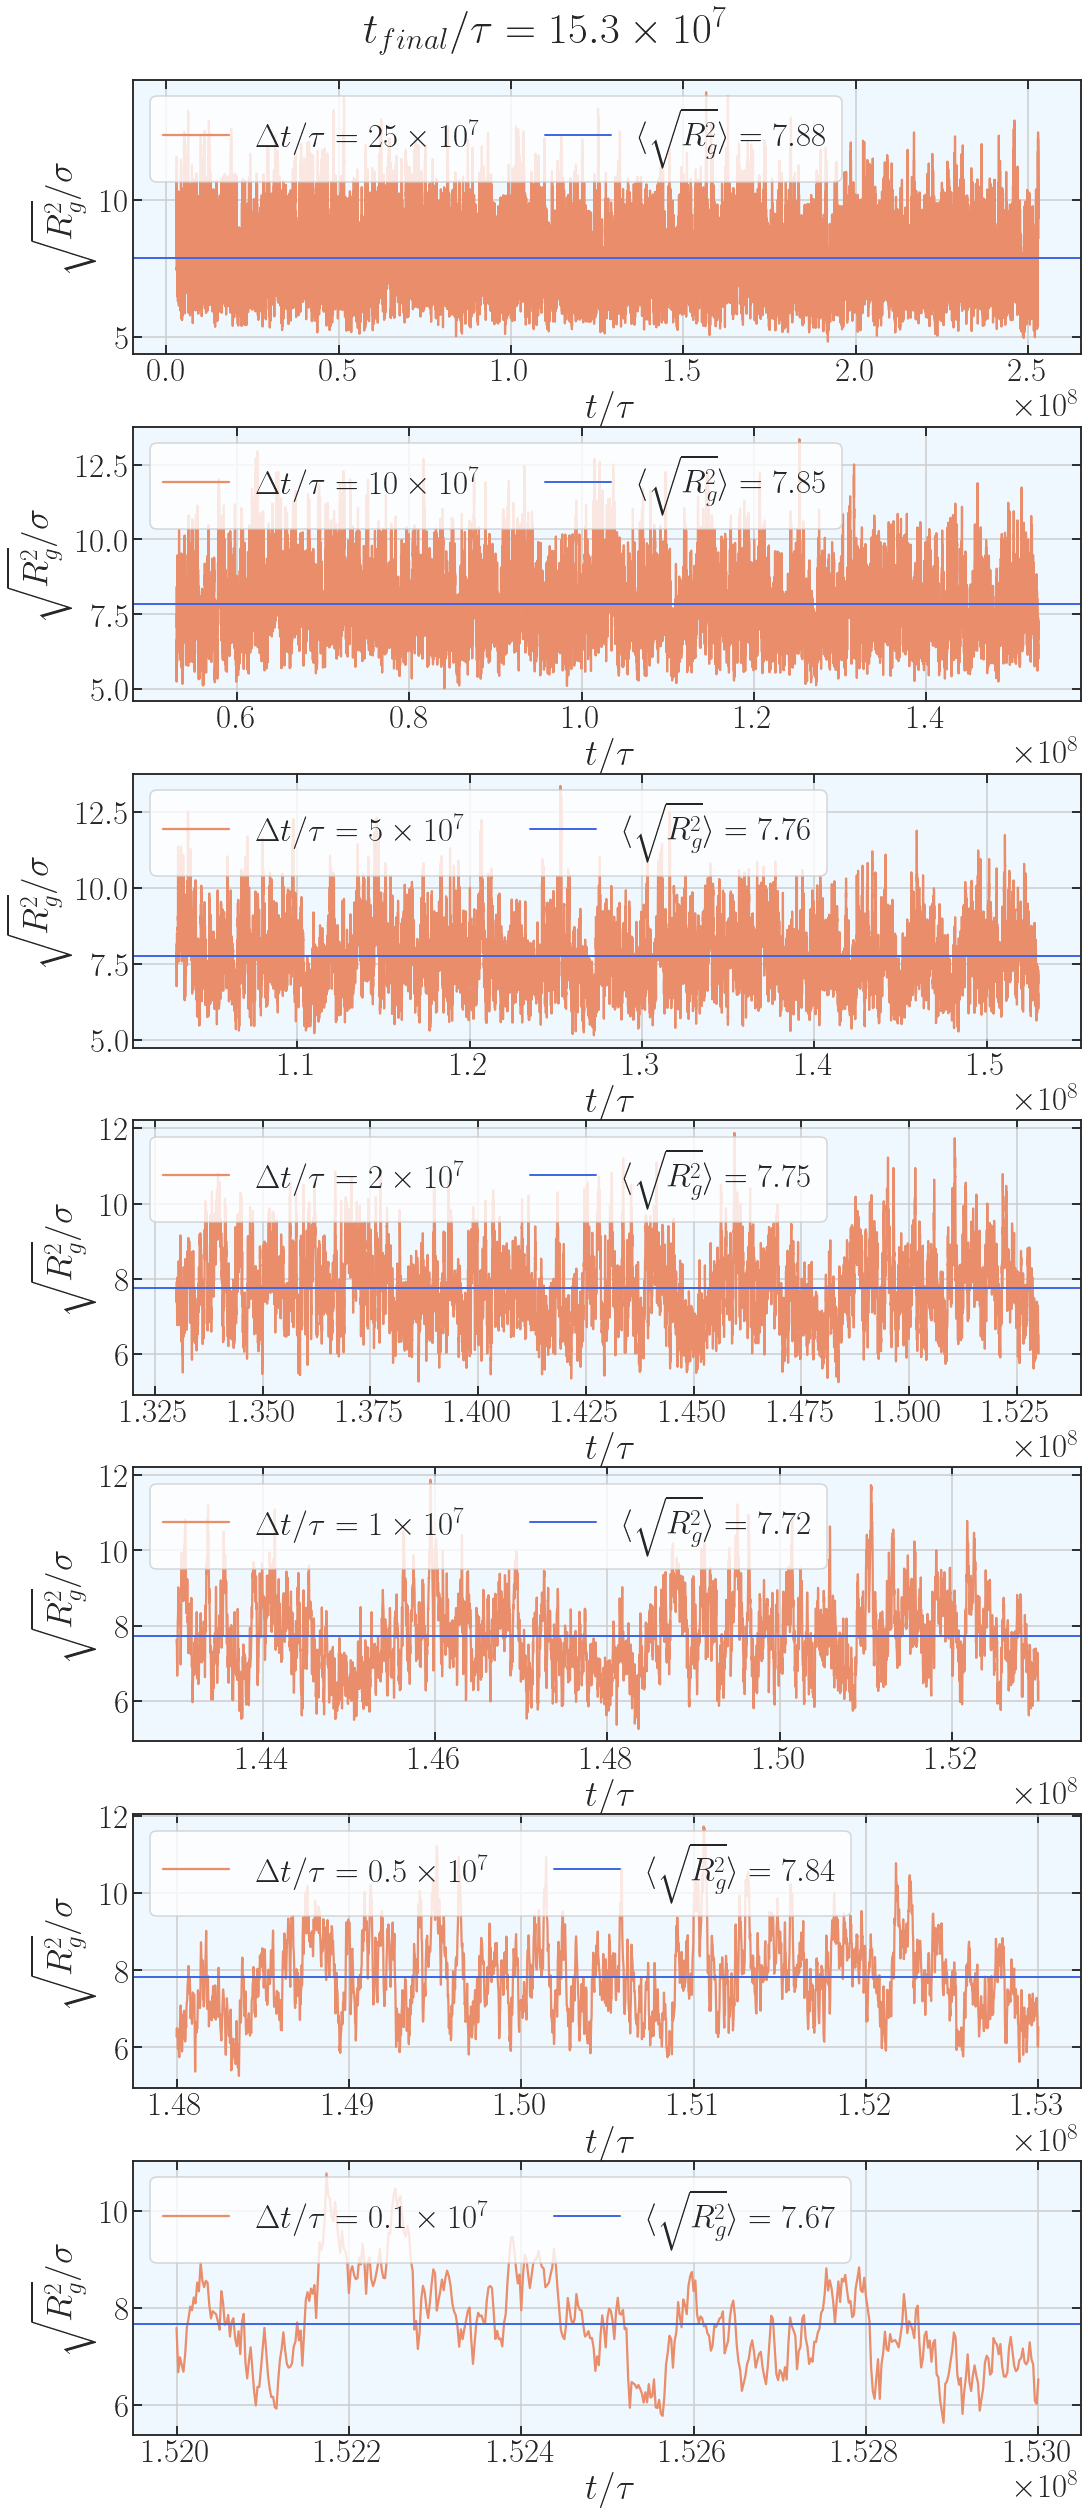

In [333]:
fig, axes = plt.subplots(7,1, figsize=(16,36))
fig.suptitle(r"$t_{final}/\tau=15.3\times 10^7$",y=0.98)
color_palette = 'flare'
#color_palette = 'tab10'
#color_palette = ['orange', 'darkgoldenrod', 'forestgreen']
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
}
font_family = 'sans-serif'
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
for ax, (t_i, t_f, dt) in zip(axes,t_choice):
    gyr_sliced = gyr.loc[(gyr['t']>=t_i)&(gyr['t']<=t_f),:]
    gyr_mean = np.round(gyr_sliced['gyr'].mean(),2)
    ax = sns.lineplot(
        data=gyr_sliced,
        x='t',
        y='gyr',
        ci=None,
        palette=color_palette,
        ax=ax,
        label=dt,
    )
    ax.axhline(
        gyr_mean, color='royalblue',
        label=rf'$\langle \sqrt{{R^2_g}}\rangle={gyr_mean}$', 
        lw=2, ls='-'
    )
    ax.legend(facecolor='white', loc='upper left', ncol=2)
    ax.set_ylabel(r'$\sqrt{R^2_g}/\sigma$')
    ax.set_xlabel(r'$t/\tau$')
fig.tight_layout(w_pad=1, h_pad=0)
plt.show()
fig.savefig("gyrTDna-slices.pdf")

### Semi-log to show reaching equilibrium

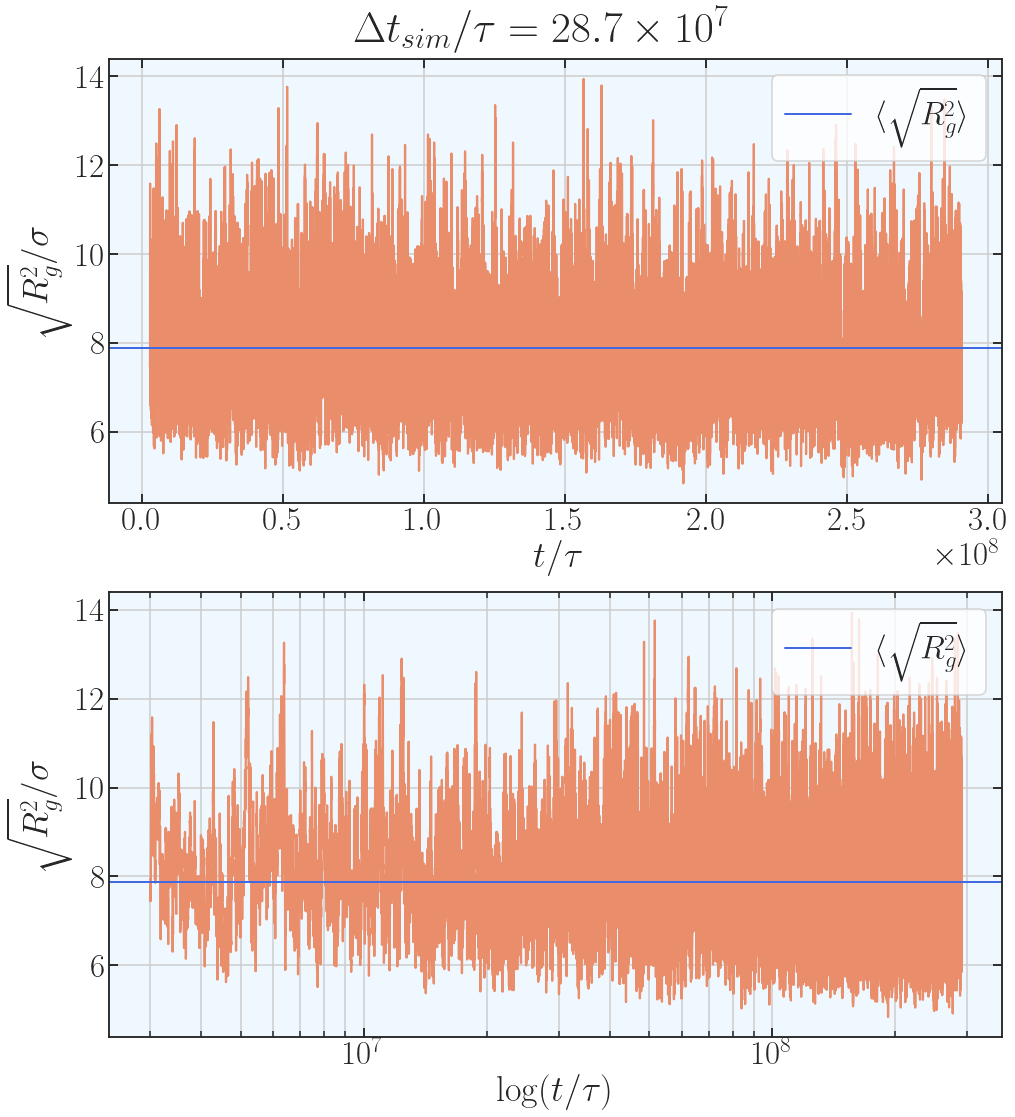

In [342]:
fig, axes = plt.subplots(2, 1, figsize=(16,18))
color_palette = 'flare'
save_to = './'
ext = 'pdf'
plot_context = 'talk'
font_scale = 2
height = 4
aspect = 2*1.618
ylabel_pad = 50
rc_params= {
    'axes.facecolor': 'aliceblue',
    'mathtext.default': 'regular',
    'text.usetex': True,
    'axes.grid': True,
    'axes.grid.axis': 'both',
    'axes.grid.which': 'both',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
}
font_family = 'sans-serif'
sns.set_theme(
    context=plot_context,
    style='ticks',
    palette=color_palette,
    font='Times New Roman',
    font_scale=font_scale,
    rc=rc_params
)
axes[0] = sns.lineplot(
    data=gyr,
    x='t',
    y='gyr',
    ci=None,
    palette=color_palette,
    ax=axes[0]
)
fig.suptitle(r"$\Delta t_{sim}/\tau=28.7\times 10^7$",y=0.92)
axes[0].set_xlabel(r'$t/\tau$')
axes[0].axhline(gyr_mean, color='royalblue', label=r'$\langle \sqrt{R^2_g}\rangle$', 
                lw=2, ls='-')
axes[0].legend(facecolor='white', loc='upper right')
axes[0].set_ylabel(r'$\sqrt{R^2_g}/\sigma$')
axes[1].semilogx(
    gyr['t'],
    gyr['gyr']
)
axes[1].set_xlabel(r'$\log(t/\tau)$')
axes[1].axhline(gyr_mean, color='royalblue', label=r'$\langle \sqrt{R^2_g}\rangle$', 
                lw=2, ls='-')
axes[1].legend(facecolor='white', loc='upper right')
axes[1].set_ylabel(r'$\sqrt{R^2_g}/\sigma$')
plt.show()
fig.savefig("gyrTDna-semiLogX.pdf")